<a href="https://colab.research.google.com/github/suhileto/Facelift/blob/main/Facelift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/Veriseti3.zip" -d "/content/"

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/Veriseti3/Passat_Faceliftsiz/x5_8863740752o0.jpg  
  inflating: /content/Veriseti3/Passat_Faceliftsiz/x5_8863740754es.jpg  
  inflating: /content/Veriseti3/Passat_Faceliftsiz/x5_88637407583g.jpg  
  inflating: /content/Veriseti3/Passat_Faceliftsiz/x5_886374075dss.jpg  
  inflating: /content/Veriseti3/Passat_Faceliftsiz/x5_886374075fa7.jpg  
  inflating: /content/Veriseti3/Passat_Faceliftsiz/x5_886374075fce.jpg  
  inflating: /content/Veriseti3/Passat_Faceliftsiz/x5_886374075itj.jpg  
  inflating: /content/Veriseti3/Passat_Faceliftsiz/x5_886374075m2g.jpg  
  inflating: /content/Veriseti3/Passat_Faceliftsiz/x5_886374075na4.jpg  
  inflating: /content/Veriseti3/Passat_Faceliftsiz/x5_886374075opo.jpg  
  inflating: /content/Veriseti3/Passat_Faceliftsiz/x5_886374075pae.jpg  
  inflating: /content/Veriseti3/Passat_Faceliftsiz/x5_886374075pfs.jpg  
  inflating: /content/Veriseti3/Passat_Faceliftsiz/x5_886374075rab.jpg  
  in

In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils,to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, AvgPool2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.applications.resnet50 import ResNet50
from keras.applications import DenseNet169, DenseNet201
from keras.optimizers import SGD
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1,EfficientNetB2
from tensorflow.keras.applications import EfficientNetB3, EfficientNetB4, EfficientNetB5
from tensorflow.keras.applications import EfficientNetB6, EfficientNetB7

In [ ]:
data_dir = "/content/Veriseti3/"
images = []
car_types = []
for car_type in ["Hyundai_Faceliftli","Hyundai_Faceliftsiz","Nissan_Faceliftli","Nissan_Faceliftsiz","Passat_Faceliftli","Passat_Faceliftsiz"]:
    car_dir = data_dir + car_type
    car_files = [car_dir + '/' + filename for filename in os.listdir(car_dir)]
    for filename in car_files:
        if filename.endswith('jpg'):
            try:
                image = cv2.imread(filename)
                images.append(cv2.resize(image, (64, 64), interpolation=cv2.INTER_CUBIC))
                car_types.append(car_type)
            except Exception as e:
                pass
images = np.array(images)
car_types = np.array(car_types)
lbl = LabelEncoder()
car_types_encoded = lbl.fit_transform(car_types)
data = np.asarray(images, dtype="float")
data2= np.asarray(car_types_encoded, dtype="float")
np.savez("car.npz",DataX=data)
np.savez("cartypes.npz",DataX=data2)

In [ ]:
path = "car.npz"
with np.load(path) as data:
    # load DataX as train_data
    train_data = data['DataX']
data = train_data
path = "cartypes.npz"
with np.load(path) as data2:
    # load DataX as train_data
    train_label = data2['DataX']
label = train_label

print(label)
print(data)

[0. 0. 0. ... 5. 5. 5.]
[[[[229. 234. 233.]
   [229. 234. 233.]
   [230. 236. 235.]
   ...
   [  0.   3.   0.]
   [  1.  15.   7.]
   [ 51.  79.  70.]]

  [[226. 231. 230.]
   [232. 237. 236.]
   [228. 234. 233.]
   ...
   [ 11.  39.  28.]
   [ 67. 100.  89.]
   [ 62.  86.  76.]]

  [[222. 227. 226.]
   [120. 125. 124.]
   [137. 139. 139.]
   ...
   [ 28.  56.  43.]
   [ 19.  46.  33.]
   [ 47.  70.  58.]]

  ...

  [[192. 198. 206.]
   [122. 197. 249.]
   [ 84. 107. 127.]
   ...
   [159. 166. 169.]
   [132. 140. 140.]
   [148. 154. 158.]]

  [[196. 209. 213.]
   [179. 199. 222.]
   [186. 209. 215.]
   ...
   [119. 126. 129.]
   [137. 144. 147.]
   [138. 145. 148.]]

  [[202. 216. 218.]
   [187. 203. 208.]
   [161. 177. 176.]
   ...
   [132. 139. 142.]
   [143. 150. 153.]
   [143. 150. 153.]]]


 [[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [248. 248. 248.]
   [255. 255. 255.]
   .

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(data, label, test_size=0.1, random_state=0)
x_train = x_train / 255
x_val = x_val / 255
y_train = to_categorical(y_train)
# y_val=to_categorical(y_val)
y_val2 = to_categorical(y_val)
datagen = ImageDataGenerator(rotation_range=20,
		horizontal_flip=True)
datagen.fit(x_train)
print(x_val.shape)
x_train.shape

(3234, 64, 64, 3)


(29105, 64, 64, 3)

In [ ]:
def build_ResNet50(input_tensor_shape):
    base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=input_tensor_shape)

    x_model = base_model.output

    x_model = AvgPool2D(name='globalaveragepooling2d')(x_model)

    x_model = Dense(1024, activation='relu', name='fc1_Dense')(x_model)
    x_model = Dropout(0.35, name='dropout_1')(x_model)
    x_model = Flatten()(x_model)
    x_model = Dense(256, activation='relu', name='fc2_Dense')(x_model)
    x_model = Dropout(0.35, name='dropout_2')(x_model)

    predictions = Dense(6, activation='softmax', name='output_layer')(x_model)

    model = Model(inputs=base_model.input, outputs=predictions)

    return model


In [ ]:
input_tensor_shape = (64, 64, 3)

model2 = build_ResNet50(input_tensor_shape)

model2.summary()

74842112/74836368 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 32, 32, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1/conv[0][0]                 
_____________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
38/38 [==============================] - 98s 1s/step - loss: 2.0232 - accuracy: 0.2269 - val_loss: 1.7920 - val_accuracy: 0.2771
Epoch 2/100
38/38 [==============================] - 19s 508ms/step - loss: 1.6204 - accuracy: 0.3091 - val_loss: 1.5931 - val_accuracy: 0.3222
Epoch 3/100
38/38 [==============================] - 20s 515ms/step - loss: 1.4943 - accuracy: 0.3844 - val_loss: 1.5631 - val_accuracy: 0.3776
Epoch 4/100
38/38 [==============================] - 19s 508ms/step - loss: 1.3075 - accuracy: 0.4418 - val_loss: 1.4738 - val_accuracy: 0.4264
Epoch 5/100
38/38 [==============================] - 19s 505ms/step - loss: 1.1496 - accuracy: 0.5183 - val_loss: 1.5570 - val_accuracy: 0.4573
Epoch 6/100
38/38 [==============================] - 19s 507ms/step - loss: 1.0168 - accuracy: 0.5631 - val_loss: 1.6512 - val_accuracy: 0.4852
Epoch 7/100
38/38 [==============================] - 19s 507ms/step - loss: 0.9432 - accuracy: 0.6044 - val_loss: 1.5779 - val_accuracy: 0.

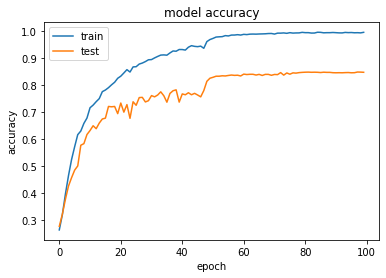

In [ ]:
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
lrr = ReduceLROnPlateau(
    monitor='loss',  # Metric to be measured
    factor=.1,  # Factor by which learning rate will be reduced
    patience=3,
    # No. of epochs after which if there is no improvement in the val_acc, the learning rate is reduced
    min_lr=1e-5)
callbacks_list=[lrr]
model2.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
nb_epoch = 100

batch_size = 256
fitted_model2 = model2.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch = 38,
                    epochs=nb_epoch,
                    validation_data = (x_val, y_val2),callbacks=[callbacks_list]
                    )
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model2.predict(x_val)
y_pred = y_pred.argmax(axis=-1)
print(y_pred)
print(y_val)
report = classification_report(y_val,y_pred)
print(report)
print(confusion_matrix(y_val,y_pred))
model2.save("model.h5")
plt.plot(fitted_model2.history['accuracy'])
plt.plot(fitted_model2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

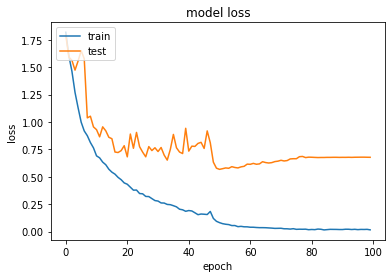

In [ ]:
plt.figure()
plt.gcf().clear()
plt.plot(fitted_model2.history['loss'])
plt.plot(fitted_model2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [ ]:
from keras.models import load_model
from sklearn.metrics import classification_report,confusion_matrix
model = load_model("model.h5")
y_pred = model.predict(x_val)
y_pred = y_pred.argmax(axis=-1)
print(y_pred)
print(y_val)
report = classification_report(y_val,y_pred)
print(report)
print(confusion_matrix(y_val,y_pred))

[2 5 2 ... 5 2 3]
[2. 4. 3. ... 5. 2. 2.]
              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79       291
         1.0       0.81      0.79      0.80       332
         2.0       0.87      0.85      0.86       840
         3.0       0.87      0.86      0.86       747
         4.0       0.73      0.75      0.74       209
         5.0       0.87      0.91      0.89       815

    accuracy                           0.85      3234
   macro avg       0.82      0.82      0.82      3234
weighted avg       0.85      0.85      0.85      3234

[[223  41   6   8   4   9]
 [ 39 261   8   5   6  13]
 [  5   9 713  72  11  30]
 [  3   3  76 642   4  19]
 [  2   2   5   2 156  42]
 [  4   7  14  13  32 745]]
